### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer

C:\Users\gopib\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\gopib\Downloads\lifestyle_dataset\lifestyle_sustainability_data.csv")

In [3]:
df

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,496,38,Rural,Mostly Plant-Based,Often,Walk,Renewable,House,1789,Sometimes,True,4,High,150,2000,Female,Rarely,Recycling,High,4
495,497,25,Urban,Balanced,Sometimes,Public Transit,Non-Renewable,Apartment,987,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,2
496,498,51,Suburban,Mostly Plant-Based,Always,Bike,Mixed,House,1678,Rarely,True,5,High,280,3200,Non-Binary,Sometimes,Recycling,Moderate,5
497,499,32,Rural,Mostly Plant-Based,Rarely,Walk,Mixed,House,1850,Often,False,1,High,397,4076,Female,Rarely,Recycling,Low,5


### EDA

In [4]:
df.columns

Index(['ParticipantID', 'Age', 'Location', 'DietType', 'LocalFoodFrequency',
       'TransportationMode', 'EnergySource', 'HomeType', 'HomeSize',
       'ClothingFrequency', 'SustainableBrands', 'EnvironmentalAwareness',
       'CommunityInvolvement', 'MonthlyElectricityConsumption',
       'MonthlyWaterConsumption', 'Gender', 'UsingPlasticProducts',
       'DisposalMethods', 'PhysicalActivities', 'Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

In [6]:
df.describe()

,ParticipantID,Age,HomeSize,EnvironmentalAwareness,MonthlyElectricityConsumption,MonthlyWaterConsumption,Rating
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.024048,44.052104,1518.046092,3.062124,291.963928,3139.521042,3.430862
std,144.233925,14.904828,672.212235,1.342145,120.482275,1224.609306,1.502585
min,1.000000,18.000000,407.000000,1.000000,55.000000,536.000000,1.000000
25%,125.500000,31.000000,951.500000,2.000000,185.000000,2000.000000,2.000000
50%,250.000000,44.000000,1450.000000,3.000000,295.000000,3350.000000,4.000000
75%,374.500000,58.000000,1995.000000,4.000000,400.000000,4100.000000,5.000000
max,500.000000,96.000000,2997.000000,5.000000,498.000000,5250.000000,5.000000


In [7]:
df.isna().sum()

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Univariate Analysis

In [9]:
viz = sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [10]:
viz.show_html('lifestyle_sustainibility_report.html')

Report lifestyle_sustainibility_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate Analysis

<Axes: title={'center': 'Comparing Age and Sustainability Rating'}, xlabel='Age', ylabel='Rating'>

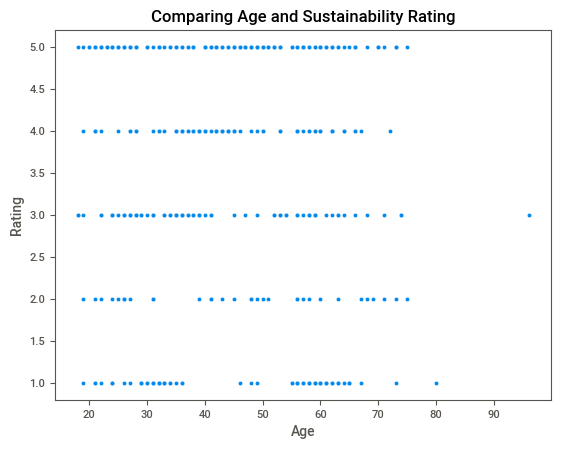

In [11]:

plt.title("Comparing Age and Sustainability Rating")
sns.scatterplot(x = df['Age'], y = df['Rating'])

Text(0, 0.5, 'Avg. Sustainability Rating')

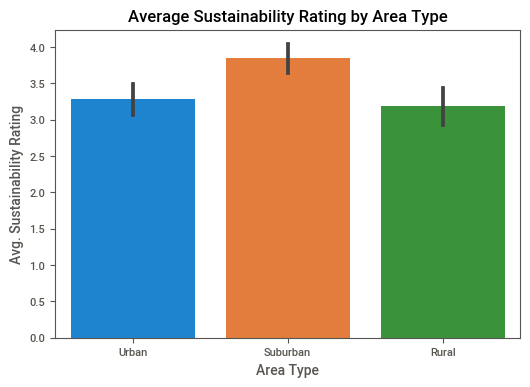

In [12]:
plt.figure(figsize = (6, 4))
sns.barplot(x = df['Location'], y = df['Rating'])
plt.title("Average Sustainability Rating by Area Type")
plt.xlabel("Area Type", )
plt.ylabel('Avg. Sustainability Rating')

Text(0, 0.5, 'Avg. Sustainability Rating')

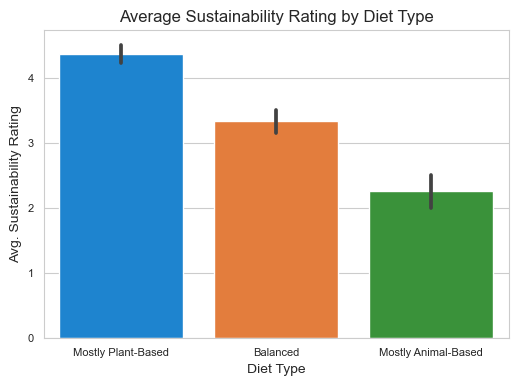

In [13]:
plt.figure(figsize = (6,4))
sns.set_style('whitegrid')
sns.barplot(x = df["DietType"], y = df["Rating"])
plt.title("Average Sustainability Rating by Diet Type")
plt.xlabel('Diet Type')
plt.ylabel("Avg. Sustainability Rating")

Text(0, 0.5, 'Avg. Sustainability Rating')

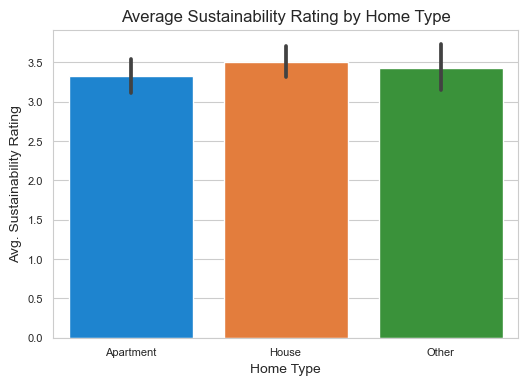

In [14]:
plt.figure(figsize = (6,4))
sns.barplot(x = df["HomeType"], y = df["Rating"])
plt.title("Average Sustainability Rating by Home Type")
plt.xlabel('Home Type')
plt.ylabel("Avg. Sustainability Rating")

Text(0, 0.5, 'Avg. Sustainability Rating')

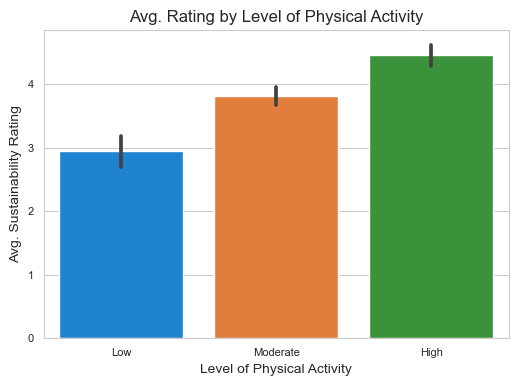

In [15]:
plt.figure(figsize = (6,4))
order = ['Low', 'Moderate', 'High']
sns.barplot(x = df["PhysicalActivities"], y = df["Rating"], order = order)
plt.title("Avg. Rating by Level of Physical Activity")
plt.xlabel('Level of Physical Activity')
plt.ylabel("Avg. Sustainability Rating")

Text(0, 0.5, 'Avg. Sustainability Rating')

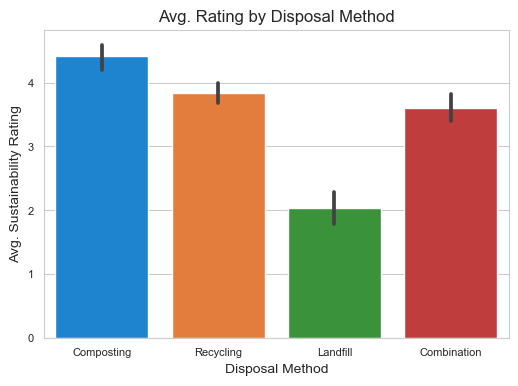

In [16]:
plt.figure(figsize = (6,4))
order = ['Composting', 'Recycling', 'Landfill', 'Combination']
sns.barplot(x = df["DisposalMethods"], y = df["Rating"], order = order)
plt.title("Avg. Rating by Disposal Method")
plt.xlabel('Disposal Method')
plt.ylabel("Avg. Sustainability Rating")

Text(0, 0.5, 'Avg. Sustainability Rating')

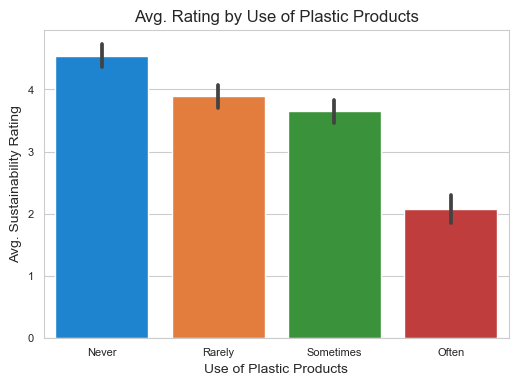

In [17]:
plt.figure(figsize = (6,4))
order = ['Never', 'Rarely', 'Sometimes', 'Often']
sns.barplot(x = df["UsingPlasticProducts"], y = df["Rating"], order = order)
plt.title("Avg. Rating by Use of Plastic Products")
plt.xlabel('Use of Plastic Products')
plt.ylabel("Avg. Sustainability Rating")

Text(0, 0.5, 'Avg. Sustainability Rating')

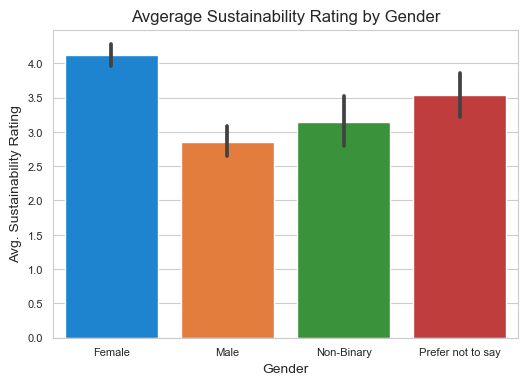

In [18]:
plt.figure(figsize = (6,4))
sns.barplot(x = df["Gender"], y = df["Rating"])
plt.title("Avgerage Sustainability Rating by Gender")
plt.xlabel('Gender')
plt.ylabel("Avg. Sustainability Rating")

Text(0, 0.5, 'Avg. Sustainability Rating')

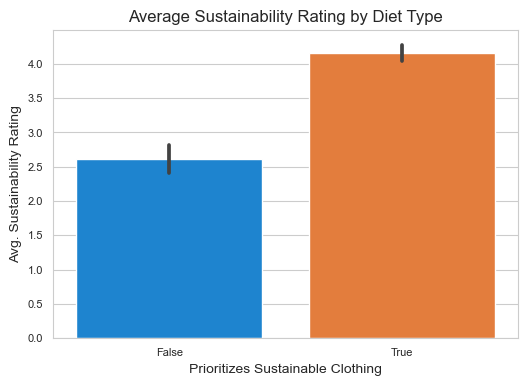

In [19]:
plt.figure(figsize = (6,4))
sns.barplot(x = df["SustainableBrands"], y = df["Rating"])
plt.title("Average Sustainability Rating by Diet Type")
plt.xlabel('Prioritizes Sustainable Clothing')
plt.ylabel("Avg. Sustainability Rating")

### Multivariate Analysis

In [20]:
df1 = df.drop('ParticipantID',axis=1)

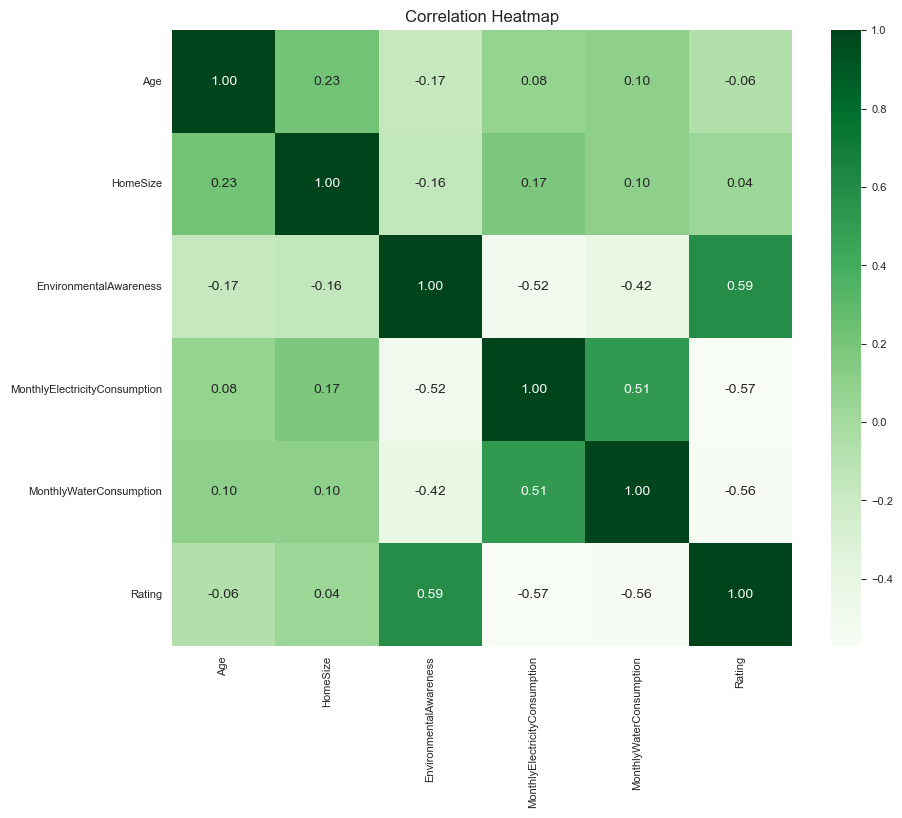

In [21]:
numeric_cols = df1.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

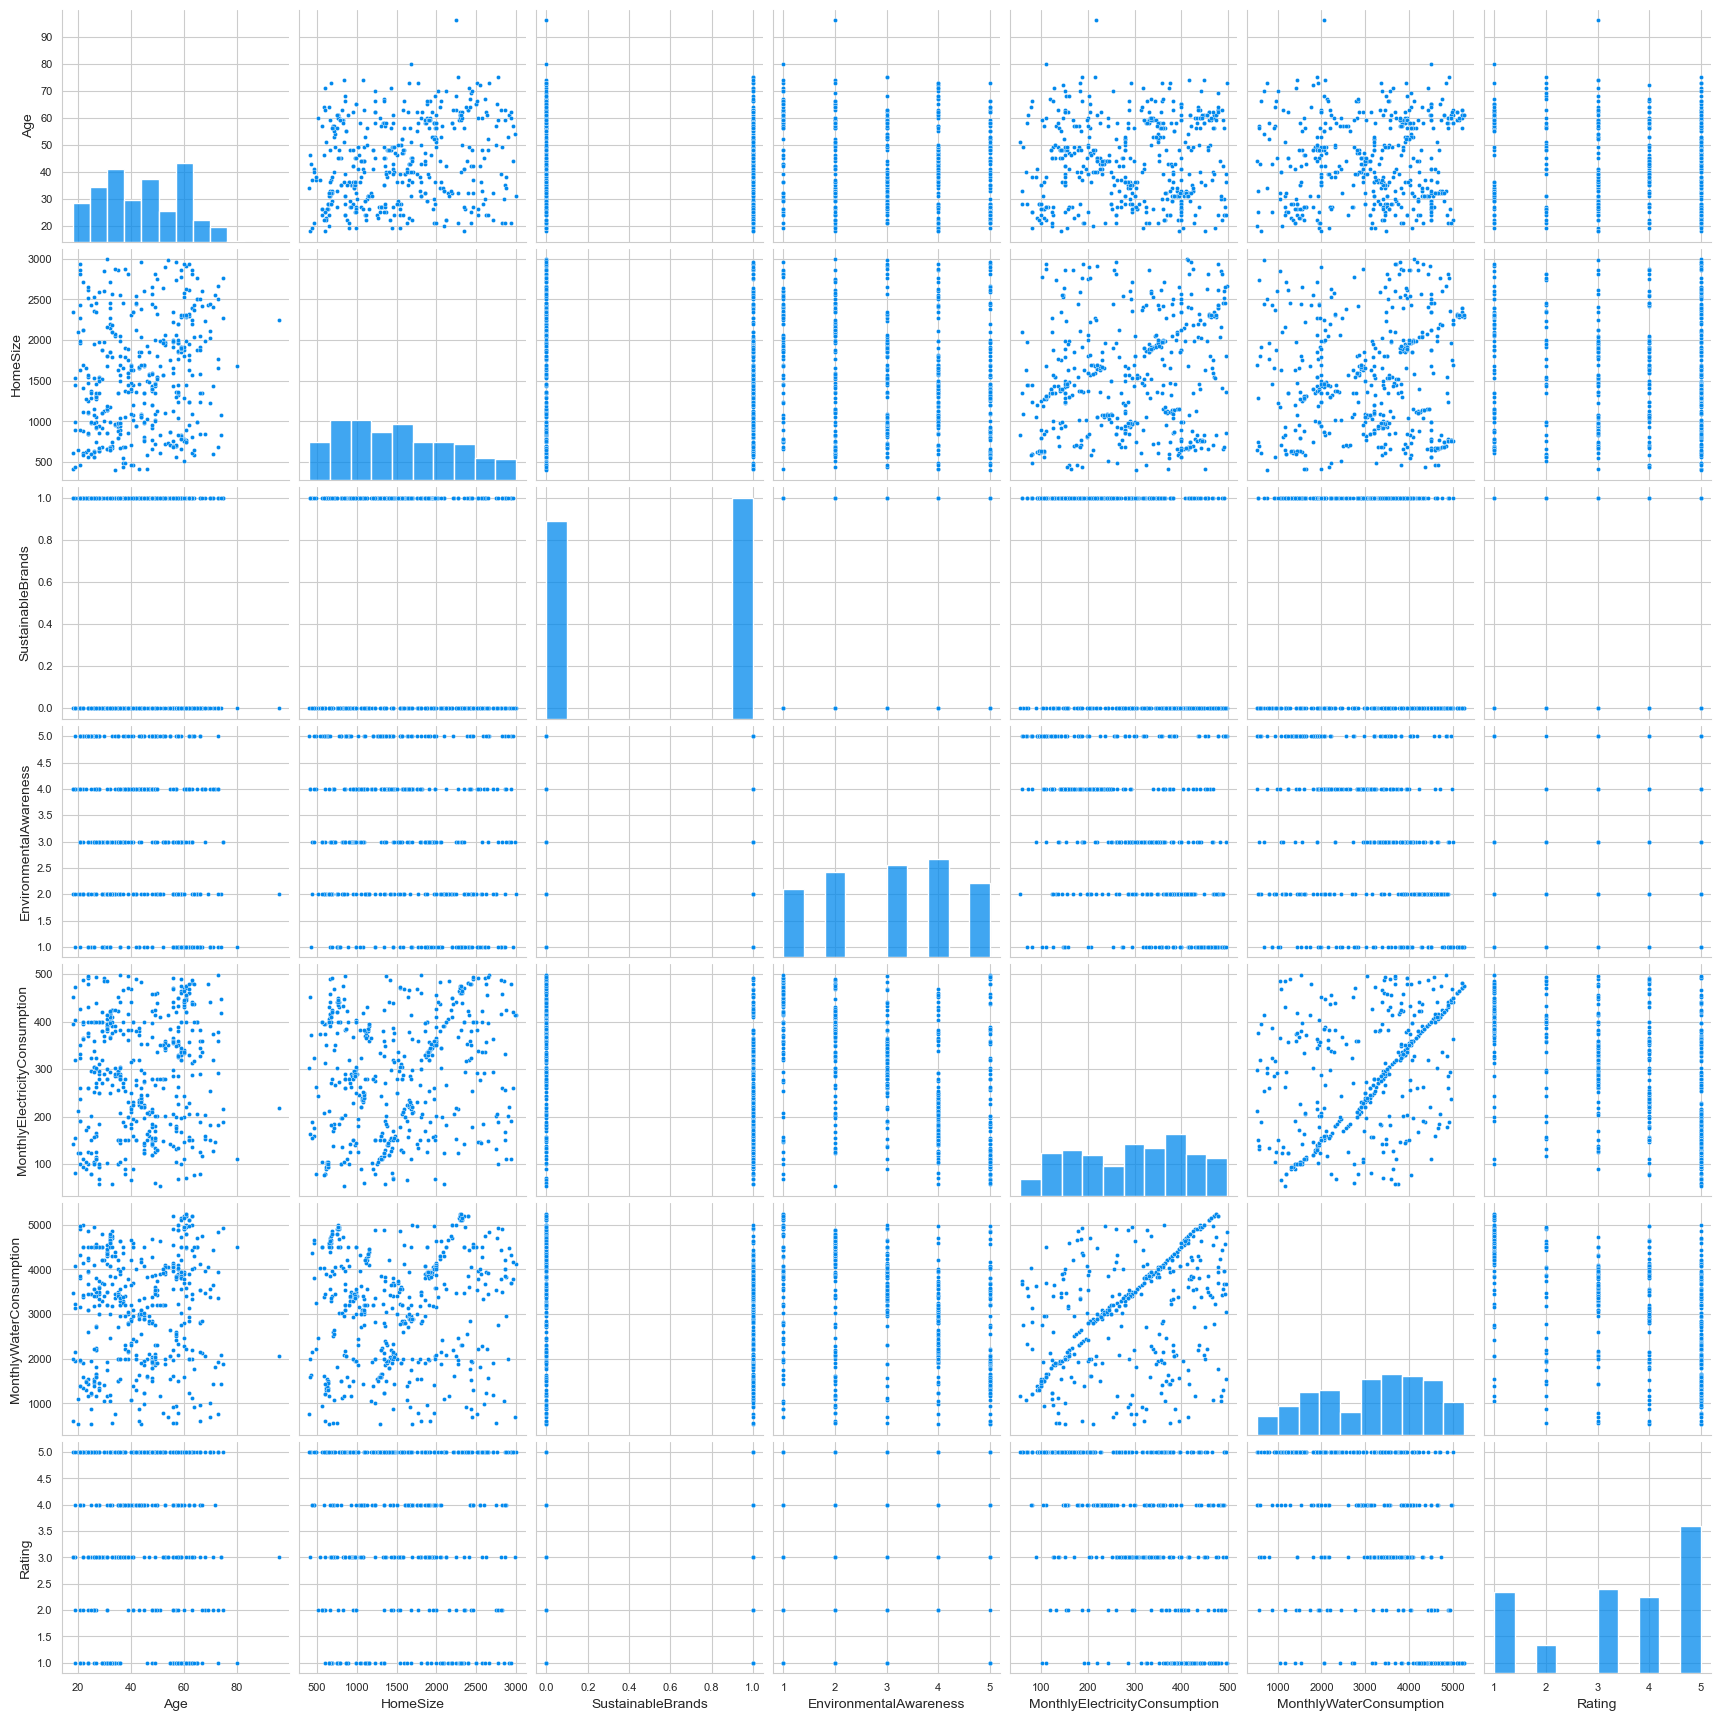

In [22]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df1)
plt.show()

### Feature variables and Target variable

In [23]:
X = df.drop(['ParticipantID','Rating'],axis=1)
y = df['Rating']

### Spliting data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [25]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [26]:
df["LocalFoodFrequency"].unique()

array(['Often', 'Sometimes', 'Rarely', 'Always'], dtype=object)

In [27]:
df['ClothingFrequency'].unique()

array(['Rarely', 'Sometimes', 'Often', 'Always'], dtype=object)

In [28]:
df['CommunityInvolvement'].unique()

array(['High', 'Moderate', 'Low', nan], dtype=object)

In [29]:
df['UsingPlasticProducts'].unique()

array(['Rarely', 'Sometimes', 'Often', 'Never'], dtype=object)

In [30]:
df['PhysicalActivities'].unique()

array(['High', 'Moderate', 'Low', nan], dtype=object)

In [31]:
order = [['Rarely', 'Sometimes', 'Often', 'Always'],
        ['Rarely', 'Sometimes', 'Often', 'Always'],
        ['Low', 'Moderate', 'High'],
        ['Never', 'Rarely', 'Sometimes', 'Often'],
        ['Low', 'Moderate', 'High']]

### Pipeline & Column transformation

In [32]:
continuous = ["Age","HomeSize","MonthlyElectricityConsumption","MonthlyWaterConsumption"]
nominal = ["Location","DietType","TransportationMode","EnergySource","HomeType","SustainableBrands","Gender","DisposalMethods"]
ordinal = ["LocalFoodFrequency","ClothingFrequency","CommunityInvolvement","UsingPlasticProducts","PhysicalActivities"]

cont_transform = Pipeline([("Mean Imputation",SimpleImputer(strategy='mean')),
         ("Transformation",PowerTransformer(method='yeo-johnson',standardize=True))])
nominal_transform = Pipeline([("Mode Imputation",SimpleImputer(strategy='most_frequent')),
         ("One Hot Encoding",OneHotEncoder(drop='first'))])
ordinal_transform = Pipeline([("Mode Imputation",SimpleImputer(strategy='most_frequent')),
                             ("Ordinal Encoding",OrdinalEncoder(categories=order))])


preprocess = ColumnTransformer([("Continuous Transformation",cont_transform,continuous),
                  ("Nominal Transformation",nominal_transform,nominal),
                  ("Ordinal Transformation",ordinal_transform,ordinal)])

preprocess

ColumnTransformer(transformers=[('Continuous Transformation',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Transformation',
                                                  PowerTransformer())]),
                                 ['Age', 'HomeSize',
                                  'MonthlyElectricityConsumption',
                                  'MonthlyWaterConsumption']),
                                ('Nominal Transformation',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('One Hot Encoding',
                                                  One...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Ordinal Encoding',
                                                  OrdinalEncoder(categories=[['Rarely',
                                                                              'Sometimes',
                                                                              'Often',
                                                                              'Always'],
                                                                             ['Rarely',
                                                                              'Sometimes',
                                                                              'Often',
                                                                              'Always'],
                                                                             ['Low',
                                                                              'Moderate',
                                                                              'High'],
                                                                             ['Never',
                                                                              'Rarely',
                                                                              'Sometimes',
                                                                              'Often'],
                                                                             ['Low',
                                                                              'Moderate',
                                                                              'High']]))]),
                                 ['LocalFoodFrequency', 'ClothingFrequency',
                                  'CommunityInvolvement',
                                  'UsingPlasticProducts',
                                  'PhysicalActivities'])])

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model1 = Pipeline([("Data Preprocessing",preprocess),
         ("Algorithm",LogisticRegression())])

model1

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', LogisticRegression())])

### Model training

In [35]:
model1.fit(X_train,y_train)

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', LogisticRegression())])

### Predict results & Model evaluation

In [36]:
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.66

### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model2 = Pipeline([("Data Preprocessing",preprocess),
         ("Algorithm",KNeighborsClassifier())])

model2

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', KNeighborsClassifier())])

In [39]:
model2.fit(X_train,y_train)

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', KNeighborsClassifier())])

In [40]:
y_pred = model2.predict(X_test)
accuracy_score(y_test,y_pred)

0.61

### SVM Classifier

In [41]:
from sklearn.svm import SVC

In [42]:
model3 = Pipeline([("Data Preprocessing",preprocess),
         ("Algorithm",SVC())])

model3

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                  ('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', SVC())])

In [43]:
model3.fit(X_train,y_train)

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                  ('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', SVC())])

In [44]:
y_pred = model3.predict(X_test)
accuracy_score(y_test,y_pred)

0.73

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model4 = Pipeline([("Data Preprocessing",preprocess),
         ("Algorithm",RandomForestClassifier())])

model4

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', RandomForestClassifier())])

In [47]:
model4.fit(X_train,y_train)

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', RandomForestClassifier())])

In [48]:
y_pred = model4.predict(X_test)
accuracy_score(y_test,y_pred)

0.72

### XGBoost

In [49]:
from xgboost import XGBClassifier

In [50]:
y1 = y-1

In [51]:
y1

0      4
1      3
2      0
3      4
4      2
      ..
494    3
495    1
496    4
497    4
498    0
Name: Rating, Length: 499, dtype: int64

In [52]:
X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.2,random_state=23)

In [53]:
model5 = Pipeline([("Data Preprocessing",preprocess),
         ("Algorithm",XGBClassifier())])

model5.fit(X_train,y1_train)
y1_pred = model5.predict(X_test)
accuracy_score(y1_test,y1_pred)

0.71

In [54]:
import pickle

In [55]:
pickle.dump(model4,open("Sustainability_rating.pkl",'wb'))
test = pickle.load(open("Sustainability_rating.pkl",'rb'))
test

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuous Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('Nominal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strateg...
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'CommunityInvolvement',
                                                   'UsingPlasticProducts',
                                                   'PhysicalActivities'])])),
                ('Algorithm', RandomForestClassifier())])

In [56]:
import sklearn
print(sklearn.__version__)

1.5.1


In [57]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [58]:
df['DietType'].unique()

array(['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based'],
      dtype=object)

In [59]:
df['HomeType'].unique()

array(['Apartment', 'House', 'Other'], dtype=object)

In [60]:
df['Gender'].unique()

array(['Female', 'Male', 'Non-Binary', 'Prefer not to say'], dtype=object)

In [61]:
df['SustainableBrands'].unique()

array([ True, False])

In [62]:
df['EnergySource'].unique()

array(['Renewable', 'Mixed', 'Non-Renewable'], dtype=object)

In [63]:
df['TransportationMode'].unique()

array(['Bike', 'Public Transit', 'Car', 'Walk'], dtype=object)